<img src="../../../Other/img/IF.jpg"  style="width:450px;height:300px;float:bottom">


点B'由于跟其他数据隔的比较远,会被认为是异常数据,而点A'会被认为是正常数据.直观上,异常数据由于跟其他数据点较为疏离,可能需要较少几次切分就可以将它们单独划分出来,而正常数据恰恰相反(Isolation Forest的核心概念).IF采用二叉树去对数据进行切分,数据点在二叉树中所处的深度反应了该条数据的"疏离"程度.整个算法大致可以分为两步:

* 训练:抽取多个样本,构建多棵二叉树(Isolation Tree,即 iTree)
* 预测:综合多棵二叉树的结果,计算每个数据点的异常分值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

In [2]:
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [3]:
# fit the model
clf = IsolationForest(max_samples=100, n_jobs=-1, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [4]:
y_pred_train

array([ 1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

In [5]:
# -0.5为阈值(越小越有可能为异常样本)
clf.score_samples(X_train)

array([-0.45612928, -0.53554568, -0.42612021, -0.57801171, -0.44309399,
       -0.43455343, -0.53760548, -0.53062519, -0.45244391, -0.52490431,
       -0.56554319, -0.49362764, -0.43742432, -0.45828407, -0.43358465,
       -0.56750359, -0.46106851, -0.52847282, -0.54190752, -0.46487778,
       -0.47035655, -0.42500304, -0.508361  , -0.49551538, -0.53628493,
       -0.43534944, -0.45080098, -0.53407791, -0.44256224, -0.48847539,
       -0.43493951, -0.51160685, -0.54477456, -0.47185569, -0.45200058,
       -0.51964675, -0.50040662, -0.59656582, -0.41946483, -0.54537242,
       -0.42896875, -0.573844  , -0.44491387, -0.48998206, -0.44754459,
       -0.47040335, -0.43311703, -0.50638811, -0.43191551, -0.4208549 ,
       -0.48467009, -0.45425508, -0.42913851, -0.60244697, -0.42852856,
       -0.53937211, -0.60475845, -0.42484901, -0.46322715, -0.52264753,
       -0.49896691, -0.61028946, -0.60812295, -0.45925761, -0.42411917,
       -0.49808991, -0.46048587, -0.54560043, -0.435555  , -0.52

In [6]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

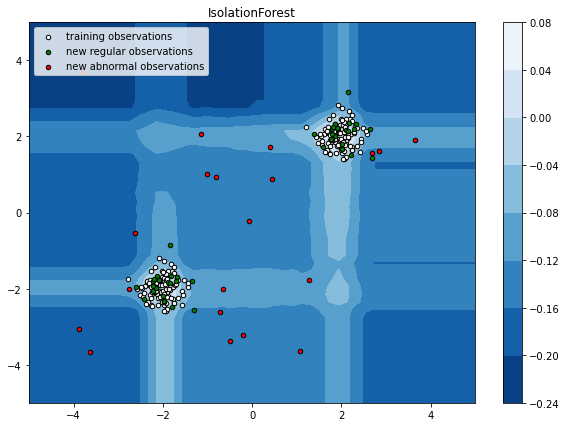

In [7]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_title("IsolationForest")
# 颜色较深的区域为异常值的可能性越大
c1 = ax.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
fig.colorbar(mappable=c1, ax=ax)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()